<a href="https://colab.research.google.com/github/CD-AC/DataEnginner-Gas_Station_Geolocation/blob/main/Gas_Station_Geolocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

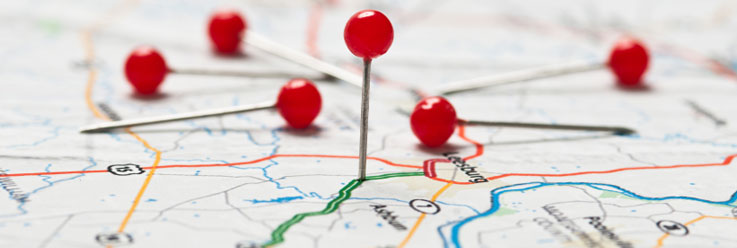

In [ ]:
#!pip install haversine
#!pip install shapely
#!pip install geopandas
#!pip install geojson
#!pip install folium
#!pip install tqdm

In [ ]:
import requests
import random
import pandas as pd
from tqdm import tqdm
from cred_here import YOUR_API_KEY
import json

import ast

# Tools

import folium
from shapely.geometry import Polygon
import numpy as np
import geojson
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import shapely.wkt
from haversine import haversine, Unit
import random
import time
from pyproj import Geod

from shapely import wkt
from geopandas import datasets, GeoDataFrame, read_file, points_from_xy
from geopandas.tools import overlay
from geopandas.tools import sjoin

from folium.plugins import MeasureControl
from folium.plugins import MarkerCluster

from tqdm import tqdm
import json

import requests
import random
import time

/mnt/c/INFO_VIP/INFO_ALEX/SPARK/google_scraper/new_scraper_google_algoritm/google_datexland_env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [ ]:
df_map = pd.read_csv('DATASET_FINAL.csv')

In [ ]:
df_map.head(2)

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Dir2,Full_Address,Coords
0,2022,6,5,ANTIOQUIA,5266,ENVIGADO,ESTACION DE SERVICIOS PREMIUM LA SEBASTIANA,TEXACO,CARRERA 27 No. 36 SUR-199,GASOLINA CORRIENTE OXIGENADA,9710.0,A,CARRERA 27 No. 36 SUR-199,"CARRERA 27 No. 36 SUR-199, Envigado, Colombia","(6.16364, -75.56929)"
1,2022,6,5,ANTIOQUIA,5266,ENVIGADO,ESTACION DE SERVICIOS PREMIUM LA SEBASTIANA,TEXACO,CARRERA 27 No. 36 SUR-199,BIODIESEL EXTRA,10510.0,A,CARRERA 27 No. 36 SUR-199,"CARRERA 27 No. 36 SUR-199, Envigado, Colombia","(6.16364, -75.56929)"


In [ ]:
df_map = df_map.drop_duplicates(subset=['Nombre_comercial','Bandera','Producto'])

In [ ]:
len(df_map)

1385

In [ ]:
df_map['Coords'].value_counts()

('NA', 'NA')            31
(4.61872, -74.07497)     6
(4.60302, -74.14303)     5
(4.66782, -74.05365)     4
(6.15239, -75.40712)     4
                        ..
(6.23586, -75.55636)     1
(6.2101, -75.56933)      1
(6.27469, -75.5754)      1
(4.59945, -74.11045)     1
(4.75523, -74.06481)     1
Name: Coords, Length: 516, dtype: int64

In [ ]:
df_map[df_map['Coords']=="('NA', 'NA')"]['Direccion'].unique()

array(['CALLE 84 SUR No.29-51 VARIANTE DE CALDAS KILOMETRO 1',
       'Avenida Carrera 30 # 2 - 38', 'CRA 17 # 50-42',
       'CALLE 80 # 24-30', 'Carrera 73 # 36A - 55 Sur',
       'Calle 13 # 38 - 25', 'Calle 19 # 33 - 68', 'Carrera 7 # 84 - 91',
       'CR 63 NO. 57 G - 74 Sur', 'cra70#44-23', 'Carrera 65 # 30 - 40',
       'DIAGONAL 51 # 35 - 120'], dtype=object)

In [ ]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 3108
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Periodo              1385 non-null   int64  
 1   Mes                  1385 non-null   int64  
 2   Codigo_departamento  1385 non-null   int64  
 3   Departamento         1385 non-null   object 
 4   Codigo_municipio     1385 non-null   int64  
 5   Municipio            1385 non-null   object 
 6   Nombre_comercial     1385 non-null   object 
 7   Bandera              1385 non-null   object 
 8   Direccion            1385 non-null   object 
 9   Producto             1385 non-null   object 
 10  Precio               1385 non-null   float64
 11  Estado               1385 non-null   object 
 12  Dir2                 1385 non-null   object 
 13  Full_Address         1385 non-null   object 
 14  Coords               1385 non-null   object 
dtypes: float64(1), int64(4), object(10)
me

In [ ]:
df_map['Coords'][0]

'(6.16364, -75.56929)'

In [ ]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[0]) # Lat

6.16364

In [ ]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[1].strip()) # Longitud

-75.56929

In [ ]:
df_map['LAT'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[0]) if x !=  "('NA', 'NA')"  else 'Empty')
df_map['LNG'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[1]) if x !=  "('NA', 'NA')"  else 'Empty')

In [ ]:
df_map['LAT'].value_counts()

Empty      31
6.17904     6
4.61872     6
4.6169      5
4.60302     5
           ..
6.20779     1
6.27469     1
6.18165     1
6.28017     1
4.69078     1
Name: LAT, Length: 513, dtype: int64

In [ ]:
df_map['LNG'].value_counts()

Empty        31
-75.56143     6
-74.07497     6
-75.55736     6
-75.5892      6
             ..
-75.24155     1
-74.17924     1
-75.5754      1
-75.55636     1
-74.06481     1
Name: LNG, Length: 510, dtype: int64

# Funciones a usar

In [ ]:
def GetLatLon2(Address,YOUR_API_KEY):

    url2_geocode  = f'https://geocode.search.hereapi.com/v1/geocode?q={Address}&apiKey='+YOUR_API_KEY

    try:
        response = requests.get(url2_geocode).json()
        CleanAddress = response['items'][0]['title'].upper()
        LAT = response['items'][0]['position']['lat']
        LON = response['items'][0]['position']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]
    except:
        results = ['NotFound','NA','NA']
    return results

def GetLatLon2_google(Address,YOUR_API_KEY):

    api_url = f'https://maps.googleapis.com/maps/api/geocode/json?address={Address}&key={YOUR_API_KEY}'
    try:
        j = requests.get(api_url).json()
        CleanAddress = str(j['results'][0]['formatted_address']).upper()
        LAT = j['results'][0]['geometry']['location']['lat']
        LON = j['results'][0]['geometry']['location']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]
    except:
        results = ['NotFound','NA','NA']
    return results,j


def cal_dist(geo_source,point2,unit):


    if unit == 'Km':
        distance = haversine(geo_source, point2,Unit.KILOMETERS)
    elif unit == 'm':
        distance = haversine(geo_source, point2,Unit.METERS)
    elif unit == 'miles':
        distance = haversine(geo_source, point2,Unit.MILES)

    return round(distance,2)


def distance_estac(geo_source,df,radio,unit):


    distancia = []
    source = []


    for i in tqdm(range(len(df)),colour = 'green'):
        distancia.append(cal_dist(geo_source,df['POINT'][i],unit))
        source.append(geo_source)

    new_df = df.copy()
    new_df['SOURCE'] = source
    new_df['DISTANCE'] = distancia
    new_df = new_df[new_df['DISTANCE']<=radio]
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns ='index')
    return new_df.sort_values(by='DISTANCE',ascending=True)

def transform_df_map(df):


    coordenadas = []

    for i in range(len(df)):

        try :

            coord = float(df['LAT'][i]),float(df['LNG'][i])
            coordenadas.append(coord)

        except :

            coordenadas.append('EMPTY')

    df['POINT'] = coordenadas
    df = df[df['POINT']!='EMPTY']
    df = df.reset_index()
    df = df.drop(columns = 'index')
    new_df = df.copy()

    return new_df

# Paso a Paso de la App

1. Filtrar la ciudad
2. Ingresar la central location
3. Configurar el radio y la unidad de medida
4. Calcular la distancia


# Filtrar ciudad

In [ ]:
cities = list(df_map['Municipio'].unique())
cities

['ENVIGADO',
 'RIONEGRO',
 'SABANETA',
 'BOGOTA, D.C.',
 'MEDELLIN',
 'BELLO',
 'ITAGUI']

In [ ]:
df_city = df_map[df_map['Municipio']==cities[3]]
df_city.reset_index(inplace =  True)
df_city.drop(columns= 'index' , inplace = True)

/mnt/c/INFO_VIP/INFO_ALEX/SPARK/google_scraper/new_scraper_google_algoritm/google_datexland_env/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_city.head(2)

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Dir2,Full_Address,Coords,LAT,LNG
0,2022,6,11,BOGOTA D.C.,11001,"BOGOTA, D.C.",EDS EL LLANO,PETROBRAS,CALLE 163 No. 72-50,GASOLINA EXTRA OXIGENADA,18500.0,A,CALLE 163 No. 72-50,"CALLE 163 No. 72-50, Bogota, d.c., Colombia","(4.74739, -74.06543)",4.74739,-74.06543
1,2022,6,11,BOGOTA D.C.,11001,"BOGOTA, D.C.",EDS EL LLANO,PETROBRAS,CALLE 163 No. 72-50,BIODIESEL EXTRA,9200.0,A,CALLE 163 No. 72-50,"CALLE 163 No. 72-50, Bogota, d.c., Colombia","(4.74739, -74.06543)",4.74739,-74.06543


In [ ]:
central_location = 'CC Multiplaza , Bogotá'
central_location = central_location.replace('#','No')
R = GetLatLon2(central_location,YOUR_API_KEY)

In [ ]:
geo_source = R[1],R[2]
geo_source

(4.65226, -74.12695)

In [ ]:
radio = 1
unit = 'Km'

In [ ]:
df_city =  transform_df_map(df_city)
df_city.head(2)

/tmp/ipykernel_21517/2018751417.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POINT'] = coordenadas


,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Dir2,Full_Address,Coords,LAT,LNG,POINT
0,2022,6,11,BOGOTA D.C.,11001,"BOGOTA, D.C.",EDS EL LLANO,PETROBRAS,CALLE 163 No. 72-50,GASOLINA EXTRA OXIGENADA,18500.0,A,CALLE 163 No. 72-50,"CALLE 163 No. 72-50, Bogota, d.c., Colombia","(4.74739, -74.06543)",4.74739,-74.06543,"(4.74739, -74.06543)"
1,2022,6,11,BOGOTA D.C.,11001,"BOGOTA, D.C.",EDS EL LLANO,PETROBRAS,CALLE 163 No. 72-50,BIODIESEL EXTRA,9200.0,A,CALLE 163 No. 72-50,"CALLE 163 No. 72-50, Bogota, d.c., Colombia","(4.74739, -74.06543)",4.74739,-74.06543,"(4.74739, -74.06543)"


In [ ]:
df_city['POINT'][0]

(4.74739, -74.06543)

In [ ]:
results = distance_estac(geo_source,df_city,radio,unit)
results.reset_index(inplace =  True)
results.drop(columns= 'index' , inplace = True)

100%|█████████████████████████████████████████████████████████████████████████████| 867/867 [00:00<00:00, 123845.03it/s]


In [ ]:
results['Nombre_comercial'].unique()

array(['EDS ESSO INDUSTRIAL BOYACA',
       'ESTACION DE SERVICIO MILENIUM GAS CALLE 13',
       'ESTACION DE SERVICIO TERPEL VILLA ALZACIA',
       'ESTACION DE SERVICIO VILLA ALSACIA'], dtype=object)

In [ ]:
results['Producto'].unique()

array(['GASOLINA EXTRA OXIGENADA', 'GASOLINA CORRIENTE OXIGENADA',
       'BIODIESEL EXTRA'], dtype=object)

In [ ]:
type(results)

pandas.core.frame.DataFrame

In [ ]:
gdf_results = GeoDataFrame(results,
                          geometry =  points_from_xy(results.LNG,results.LAT))

In [ ]:
type(gdf_results)

geopandas.geodataframe.GeoDataFrame

In [ ]:
gdf_results.head(2)

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,...,Estado,Dir2,Full_Address,Coords,LAT,LNG,POINT,SOURCE,DISTANCE,geometry
0,2022,6,11,BOGOTA D.C.,11001,"BOGOTA, D.C.",EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,GASOLINA EXTRA OXIGENADA,...,A,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota, d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65226, -74.12695)",0.41,POINT (-74.12340 4.65127)
1,2022,6,11,BOGOTA D.C.,11001,"BOGOTA, D.C.",EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,GASOLINA CORRIENTE OXIGENADA,...,A,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota, d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65226, -74.12695)",0.41,POINT (-74.12340 4.65127)


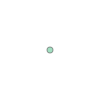

In [ ]:
gdf_results['geometry'][0]

In [ ]:
oil = list(gdf_results['Producto'].unique())
oil

['GASOLINA EXTRA OXIGENADA', 'GASOLINA CORRIENTE OXIGENADA', 'BIODIESEL EXTRA']

In [ ]:
gdf_results_2 = gdf_results[gdf_results['Producto']==oil[1]]
gdf_results_2.reset_index(inplace =  True)
gdf_results_2.drop(columns= 'index' , inplace = True)

/mnt/c/INFO_VIP/INFO_ALEX/SPARK/google_scraper/new_scraper_google_algoritm/google_datexland_env/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
gdf_results_2.columns

Index(['Periodo', 'Mes', 'Codigo_departamento', 'Departamento',
       'Codigo_municipio', 'Municipio', 'Nombre_comercial', 'Bandera',
       'Direccion', 'Producto', 'Precio', 'Estado', 'Dir2', 'Full_Address',
       'Coords', 'LAT', 'LNG', 'POINT', 'SOURCE', 'DISTANCE', 'geometry'],
      dtype='object')

In [ ]:
gdf_results_2['Precio'].min()

8630.0

In [ ]:
gdf_results_2['Precio'].max()

9630.0

In [ ]:
def marker_rest(df,mapa,unit,oil,icono):

    df = df[df['Producto']==oil]
    df = df.reset_index()
    df = df.drop(columns = 'index')

    for i in range(len(df)):

        if df['Precio'][i]==df['Precio'].min():

            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)




            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkgreen', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup = popup).add_to(mapa)

        elif df['Precio'][i]==df['Precio'].max():

            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkred', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)
        else :
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='orange', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)

    return

# Show Map

In [ ]:
m = folium.Map([geo_source[0],geo_source[1]], zoom_start= 15)

folium.Circle(

    radius = int(radio)*1000,
    location = [geo_source[0],geo_source[1]],
    color = 'green',
    fill = 'green'

).add_to(m)

folium.Marker(

            location = [geo_source[0],geo_source[1]],
            icon =  folium.Icon(color='black',icon_color='white',
            icon = "home",prefix = 'glyphicon'),
            popup = "<b>Centroid</b>").add_to(m)

marker_rest(gdf_results_2,m,unit,oil[1],'usd')

m